In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
test = './input/test.csv'
train = './input/train.csv'
spray = './input/spray.csv'
weather = './input/weather.csv'

In [4]:
test = pd.read_csv(test)
train = pd.read_csv(train)
spray = pd.read_csv(spray)
weather = pd.read_csv(weather)

In [5]:
train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

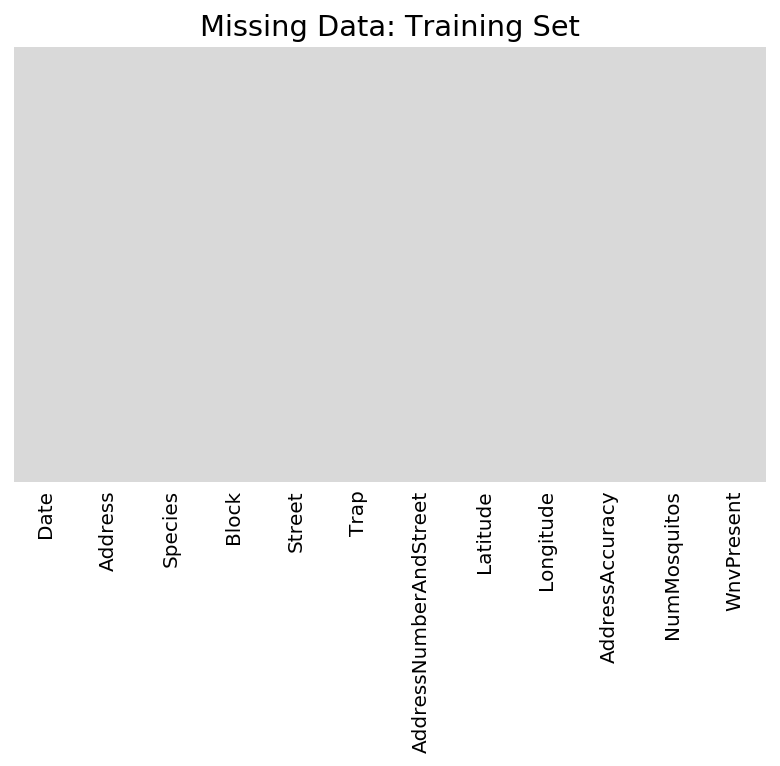

In [6]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [7]:
train['station'] = train['Latitude'].apply(lambda x: 1 if x>=41.85 else 0)

In [8]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,station
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1


In [9]:
train.groupby('Species').mean()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,station
Species,,,,,,,
CULEX ERRATICUS,10.000000,41.974689,-87.890615,9.000000,7.000000,0.000000,1.000000
CULEX PIPIENS,32.799926,41.813402,-87.680481,7.424972,16.550945,0.088922,0.398296
CULEX PIPIENS/RESTUANS,36.706439,41.848832,-87.705241,7.939604,13.945286,0.055135,0.528409
CULEX RESTUANS,36.784307,41.859096,-87.713366,8.019708,8.551460,0.017883,0.564234
CULEX SALINARIUS,32.627907,41.825134,-87.693788,7.767442,1.686047,0.000000,0.453488
CULEX TARSALIS,30.500000,41.818023,-87.661568,7.500000,1.166667,0.000000,0.333333
CULEX TERRITANS,36.900901,41.798297,-87.658375,7.599099,2.297297,0.000000,0.301802


In [10]:
train.describe(include='all')

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,station
count,10506,10506,10506,10506.000000,10506,10506,10506,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
unique,95,138,7,NaN,128,136,138,NaN,NaN,NaN,NaN,NaN,NaN
top,2007-08-01,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,NaN,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",NaN,NaN,NaN,NaN,NaN,NaN
freq,551,750,4752,NaN,750,750,750,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,35.687797,NaN,NaN,NaN,41.841139,-87.699908,7.819532,12.853512,0.052446,0.498858
std,NaN,NaN,NaN,24.339468,NaN,NaN,NaN,0.112742,0.096514,1.452921,16.133816,0.222936,0.500022
min,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,41.644612,-87.930995,3.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,41.732984,-87.760070,8.000000,2.000000,0.000000,0.000000
50%,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,41.846283,-87.694991,8.000000,5.000000,0.000000,0.000000
75%,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,41.954690,-87.627796,9.000000,17.000000,0.000000,1.000000


In [11]:
# To drop column
train.drop(['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy'], axis=1, inplace=True)

In [12]:
train.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,station
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,1
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,1
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,1
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,1
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,1


In [13]:
train['year'] = pd.DatetimeIndex(train['Date']).year
train['month'] = pd.DatetimeIndex(train['Date']).month
train['hour'] = pd.DatetimeIndex(train['Date']).hour
train.drop(['Date'], axis=1, inplace=True)

In [14]:
# Dummy coded variable
# The category you leave out, which the other columns are relative to is often referred to as the reference category.
dummy = pd.get_dummies(train['Species'],drop_first=True)
train = pd.concat([train, dummy], axis=1)
train.drop(['Species'], axis=1, inplace=True)

In [15]:
# Dummy coded variable
# The category you leave out, which the other columns are relative to is often referred to as the reference category.
dummy = pd.get_dummies(train['Trap'],drop_first=True)
train = pd.concat([train, dummy], axis=1)
train.drop(['Trap'], axis=1, inplace=True)

In [16]:
train.drop(['Latitude'], axis=1, inplace=True)
train.drop(['Longitude'], axis=1, inplace=True)

In [17]:
cols = list(train.columns)
cols.remove('WnvPresent')

X = train[cols]
y = train.WnvPresent.values

In [18]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Build the selector — we'll build one with each score type.
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# Train the selector on the data.
skb_f.fit(X, y)
skb_chi2.fit(X, y)

# Examine the results.
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
kbest

/Users/bokshenggan/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [4] are constant.
  UserWarning)
/Users/bokshenggan/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,feature,f_classif,chi2 score
0,NumMosquitos,423.301,8241.1
3,month,106.408,15.6116
5,CULEX PIPIENS,98.1293,72.2586
7,CULEX RESTUANS,89.8487,65.8651
2,year,27.2467,0.0749854
144,T900,20.5801,19.0772
10,CULEX TERRITANS,12.5654,12.2875
99,T143,12.4689,12.4197
12,T003,9.64976,9.53076
139,T233,7.75374,7.71262


In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler.
ss = StandardScaler()

# Fit the data using the scaler (scale the data).
Xs = ss.fit_transform(X.values)
print Xs.mean(), Xs.std()

8.12511544951e-18 0.996569458157


/Users/bokshenggan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

accs = cross_val_score(model, Xs, y, cv=10)
print accs
print np.mean(accs)

[ 0.94676806  0.87250238  0.90009515  0.94766889  0.93720266  0.95047619
  0.94380952  0.92380952  0.93142857  0.88761905]
0.924137999505


In [21]:
from sklearn.model_selection import cross_val_score

# plot test accuracy by number of neighbors:
test_acc = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

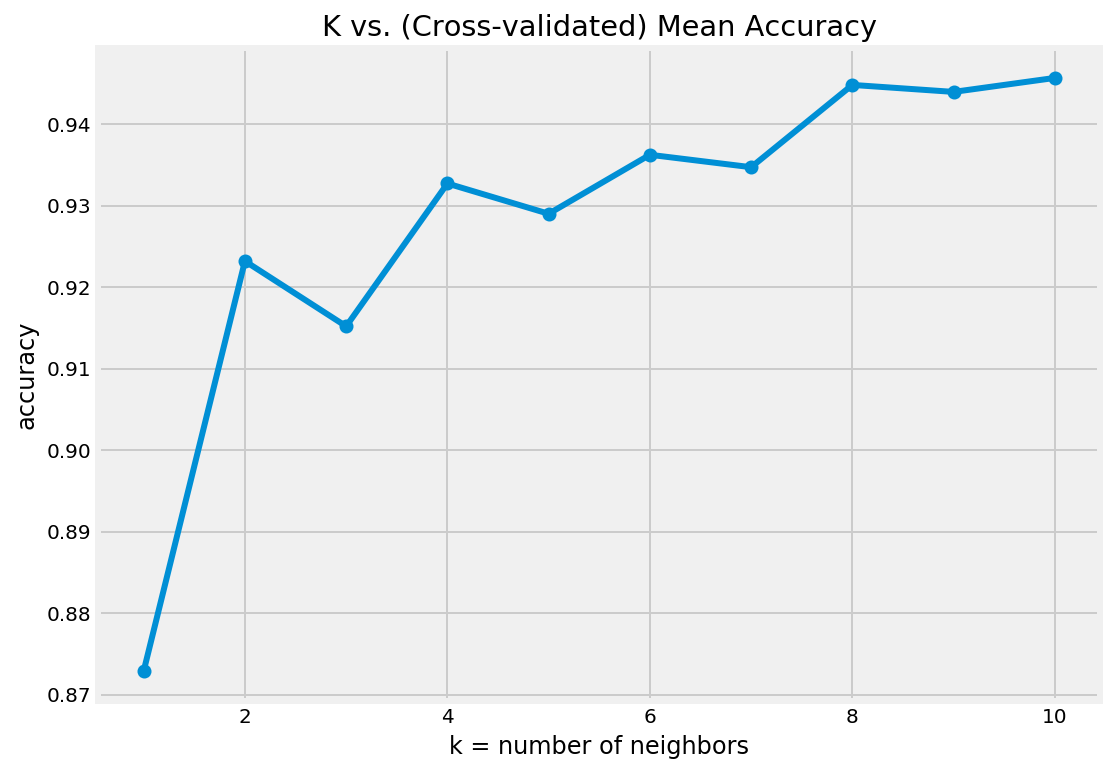

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, 11), test_acc, lw=3., marker='o')
plt.xlabel('k = number of neighbors')
plt.ylabel('accuracy')
plt.title('K vs. (Cross-validated) Mean Accuracy')
plt.show()